In [1]:
# HIDDEN

from datascience import *
import numpy as np
# import random

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
'''
the random module provides many useful function including:
randint(a,b) - Return a random integer N such that a <= N < b.  
shuffle(list) - Shuffle the items in a list in-place
choice(list) - Return a randomly selected item from a list
seed(a) - Initialize the random module with a specific seed value so it always generates the same sequence of “random” selections.
'''

In [2]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'control'

In [3]:
np.random.choice(two_groups, 10)

array(['control', 'control', 'treatment', 'treatment', 'control',
       'control', 'control', 'treatment', 'treatment', 'control'],
      dtype='<U9')

In [4]:
3 > 1 + 1

True

In [5]:
5 = 10/2

SyntaxError: can't assign to literal (<ipython-input-5-e8c755f5e450>, line 1)

In [6]:
5 == 10/2

True

In [7]:
1 < 1 + 1 < 3

True

In [8]:
x = 12
y = 5
min(x, y) <= (x+y)/2 <= max(x, y)

True

In [9]:
# Strings can also be compared, and their order is alphabetical. A shorter string is less than a longer string that begins with the shorter string.
'Dog' > 'Catastrophe' > 'Cat'

True

In [10]:
np.random.choice(two_groups) == 'treatment'

False

In [11]:
# Comparing an Array and a Value
tosses = make_array('Tails', 'Heads', 'Tails', 'Heads', 'Heads')
tosses == 'Heads'

array([False,  True, False,  True,  True])

In [12]:
''' ************************ Comparing an Array ************************ '''

# The numpy method count_nonzero evaluates to the number of non-zero (that is, True) elements of the array.
np.count_nonzero(tosses == 'Heads')
# 1 is true, 0 is false

3

In [13]:
def sign(x):
    if x > 0:
        return 'Positive'

In [14]:
sign(3)

'Positive'

In [15]:
sign(-3)
#if expression evaluates to a false value, and so the return statement is skipped and the function call has no value.

In [16]:
def sign(x):
    if x > 0:
        return 'Positive'
    elif x < 0:
        return 'Negative'

In [17]:
sign(-3)

'Negative'

In [18]:
def sign(x):
    if x > 0:
        return 'Positive'
    elif x < 0:
        return 'Negative'
    elif x == 0:
        return 'Neither positive nor negative'

In [19]:
sign(0)

'Neither positive nor negative'

In [20]:
def sign(x):
    if x > 0:
        return 'Positive'
    elif x < 0:
        return 'Negative'
    else:
        return 'Neither positive nor negative'

In [21]:
sign(0)

'Neither positive nor negative'

In [22]:
def other_one(x, a_b):    
    """Compare x with the two elements of a_b;
    if it is equal to one of them, return the other one;
    if it is not equal to either of them, return an error message.
    """
    if x == a_b.item(0):
        return a_b.item(1)
    elif x == a_b.item(1):
        return a_b.item(0)
    else:
        return 'The input is not valid.'

In [23]:
colors = make_array('red', 'blue')
other_one('red', colors)

'blue'

In [24]:
other_one('blue', colors)

'red'

In [25]:
other_one('potato', colors)

'The input is not valid.'

In [40]:
''' The Monty Hall Problem '''
doors = make_array('Car', 'Goat 1', 'Goat 2')
goats = make_array('Goat 1', 'Goat 2')

In [41]:
original = 'Goat 1'
make_array(original, other_one(original, goats), 'Car')

array(['Goat 1', 'Goat 2', 'Car'], dtype='<U6')

In [42]:
original = 'Car'
throw_out = np.random.choice(goats)
make_array(original, throw_out, other_one(throw_out, goats))

array(['Car', 'Goat 2', 'Goat 1'], dtype='<U6')

In [43]:
def is_goat(door_name):

    """ Check whether the name of a door (a string) is a Goat.
    
    Examples:
    =========
    
    >>> is_goat('Goat 1')
    True
    >>> is_goat('Goat 2')
    True
    >>> is_goat('Car')
    False
    """
    if door_name == "Goat 1":
        return True
    elif door_name == "Goat 2":
        return True
    else:
        return False


def monty_hall():

    """ Play the Monty Hall game once
    and return an array of three strings:
    
    original choice, what Monty throws out, what remains
    """

    original = np.random.choice(doors)

    if is_goat(original):
        return make_array(original, other_one(original, goats), 'Car')

    else:
        throw_out = np.random.choice(goats)
        return make_array(original, throw_out, other_one(throw_out, goats))

In [45]:
# Number of times we'll play the game
N = 10000

original = make_array()     # original choice
throw_out = make_array()    # what Monty throws out
remains = make_array()      # what remains

for i in np.arange(N): 
    result = monty_hall()    # the result of one game

    # Collect the results in the appropriate arrays
    original = np.append(original, result.item(0))
    throw_out = np.append(throw_out, result.item(1))
    remains = np.append(remains, result.item(2))

# The for-loop is done! Now put all the arrays together in a table.
results = Table().with_columns(
    'Original Door Choice', original,
    'Monty Throws Out', throw_out,
    'Remaining Door', remains
)
results

Original Door Choice,Monty Throws Out,Remaining Door
Car,Goat 2,Goat 1
Goat 2,Goat 1,Car
Car,Goat 1,Goat 2
Goat 1,Goat 2,Car
Goat 2,Goat 1,Car
Goat 2,Goat 1,Car
Goat 2,Goat 1,Car
Goat 1,Goat 2,Car
Goat 2,Goat 1,Car
Goat 2,Goat 1,Car


In [46]:
results.group('Original Door Choice')

Original Door Choice,count
Car,3262
Goat 1,3348
Goat 2,3390


In [47]:
results.group('Remaining Door')
'''As our solution said, the car is behind the remaining door two-thirds of the time, to a pretty good approximation. 
The contestant is twice as likely to get the car if she switches than if she sticks with her original choice.'''

Remaining Door,count
Car,6738
Goat 1,1665
Goat 2,1597


In [48]:
#To visualize the results, we can join the two tables above and draw overlaid bar charts.
results_o = results.group('Original Door Choice')
results_r = results.group('Remaining Door')
joined = results_o.join('Original Door Choice', results_r, 'Remaining Door')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined


Item,Original Door,Remaining Door
Car,3262,6738
Goat 1,3348,1665
Goat 2,3390,1597


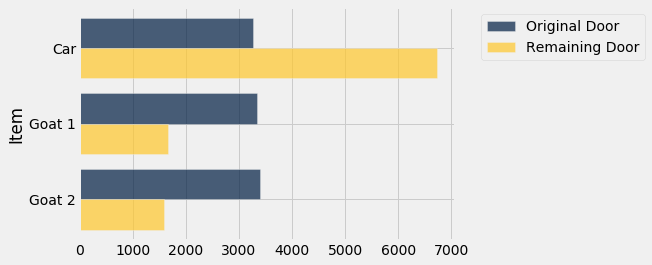

In [49]:
combined.barh(0)
'''
Notice how the three blue bars are almost equal – the original choice is equally likely to be any of the three available items.
But the gold bar corresponding to Car is twice as long as the blue.
The simulation confirms that the contestant is twice as likely to win if she switches.
'''

In [ ]:
'''
If you are rolling an ordinary die, a natural assumption is that all six faces are equally likely. 
Then probabilities of how one roll comes out can be easily calculated as a ratio.
When All Outcomes are Equally Likely
'''

'''
When Two Events Must Both Happen. In general, we have the multiplication rule
Thus, when there are two conditions – one event must happen, as well as another – the chance is a fraction of a fraction, 
When an Event Can Happen in Two Different Ways. In general, we have the addition rule
Each of GR and RG has chance  1/6  by the calculation above. (１／３＊　　１／２)
So you can calculate the chance of "one green and one red" by adding them up.　（１／６　＋　１／６）
'''

'''
At Least One Success：　the problem is to find the chance that the sample contains a success.
If you toss a coin twice, there are four equally likely outcomes: HH, HT, TH, and TT.
The chance of getting at least one head in two tosses is therefore 3/4.
Another way of coming up with this answer is to work out what happens if you don't get at least one head: both the tosses have to land tails. 
'''
𝑃(at least one head in 17 tosses) = 1−𝑃(all 17 are tails) = 1−(1/2)^17
𝑃(a single roll is not 6) = 𝑃(1)+𝑃(2)+𝑃(3)+𝑃(4)+𝑃(5) = 5/6
𝑃(at least one 6 in two rolls) = 1−𝑃(both rolls are not 6) = 1−(5/6)^2
𝑃(at least one 6 in 17 rolls) = 1−(5/6)^17

In [50]:
# The table below shows these probabilities as the number of rolls increases from 1 to 50.
rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


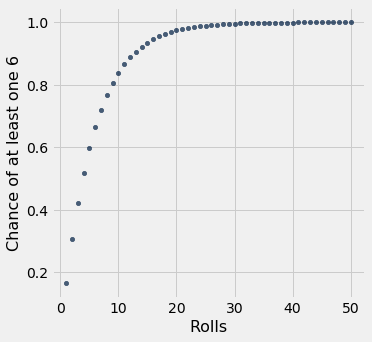

In [51]:
# The chance that a 6 appears at least once rises rapidly as the number of rolls increases.
results.scatter('Rolls')

In [52]:
# In 50 rolls, you are almost certain to get at least one 6.
results.where('Rolls', are.equal_to(50))
'''
But what we have observed above can usually be generalized: 
increasing the size of the random sample increases the chance that an individual is selected.
'''

Rolls,Chance of at least one 6
50,0.99989


In [ ]:
'''******************* Probability with Replacement ********************
If we want to know the probability of two events in a row with replacement we use the addition rule.
Example
What is the probability of drawing a 2 and a 7 from a deck of cards?  The order doesn’t matter
4/52 + 4/52 = 8/52
'''

'''*******************  Probability without Replacement ********************
Example
You have a bag with 30 m&m’s, 9 are brown, 3 are orange, 3 are green, 3 are blue, 6 are yellow, and 6 are red.
What is the probability of eating a orange m&m then a yellow m&m?
3/30 * 6/29
'''

In [53]:
top1 = Table.read_table('top_movies.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')
top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
1,Avatar,Fox,"760,507,625","846,120,800",2009
2,Titanic,Paramount,"658,672,302","1,178,627,900",1997
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
4,Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
5,The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
6,Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
7,Star Wars,Fox,"460,998,007","1,549,640,500",1977
8,Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
9,The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [56]:
# When you simply specify which elements of a set you want to choose you create a deterministic sample.
'''******************* Deterministic Samples********************'''
'''******************* You have done this many times, for example by using take or where: ********************'''
top.take(make_array(3, 18, 100))
# make_array(3, 18, 100)
# top2.take(make_array('Jurassic Word')) IS WRONG!! THE FIRST COLUMN MUST BE NUMBERS TO USE "TAKE"

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
18,Spider-Man,Sony,"403,706,375","604,517,300",2002
100,Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939


In [58]:
'''*******************  You have also used where , for example by using are.containing : ********************'''
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,"381,011,219","417,512,200",2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,"317,575,550","486,442,900",2001
54,Harry Potter and the Half-Blood Prince,Warner Bros.,"301,959,197","352,098,800",2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,"292,004,738","369,250,200",2007
62,Harry Potter and the Goblet of Fire,Warner Bros.,"290,013,036","393,024,800",2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,"261,988,482","390,768,100",2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,"249,541,069","349,598,600",2004


In [ ]:
'''  ********* Probability Sample      *********
A probability sample is one for which it is possible to calculate, before the sample is drawn, 
the chance with which any subset of elements will enter the sample.
In a probability sample, all elements need not have the same chance of being chosen.
'''

'''
A Random Sampling Scheme


This is a probability sample of size 2. Here are the chances of entry for all non-empty subsets:

A: 1 
B: 1/2
C: 1/2
AB: 1/2
AC: 1/2
BC: 0
ABC: 0
'''

In [62]:
'''  ********* Systematic Sample      *********
Imagine all the elements of the population listed in a sequence. One method of sampling starts by choosing a random position 
early in the list, and then evenly spaced positions after that. The sample consists of the elements in those positions. 
Such a sample is called a systematic sample.

Here we will choose a systematic sample of the rows of top. We will start by picking one of the first 10 rows at random, 
and then we will pick every 10th row after that.
'''
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

# Run the cell a few times to see how the output varies.

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
5,The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
15,Toy Story 3,Buena Vista (Disney),"415,004,880","454,156,300",2010
25,The Lord of the Rings: The Return of the King,New Line,"377,845,905","536,265,400",2003
35,Spider-Man 3,Sony,"336,530,303","425,554,300",2007
45,The Lord of the Rings: The Fellowship of the Ring,New Line,"315,544,750","476,753,700",2001
55,The Twilight Saga: Eclipse,Sum.,"300,531,751","328,883,800",2010
65,The Matrix Reloaded,Warner Bros.,"281,576,461","406,254,600",2003
75,Men in Black,Sony,"250,690,539","475,165,100",1997
85,Cast Away,Fox,"233,632,142","364,479,500",2000
95,Mission: Impossible II,Paramount,"215,409,889","347,693,200",2000


In [ ]:
'''   ********* Systematic Sample      *********
This systematic sample is a probability sample. In this scheme, all rows have chance 1/10 of being chosen. For example, 
Row 23 is chosen if and only if Row 3 is chosen, and the chance of that is 1/10.

But not all subsets have the same chance of being chosen. Because the selected rows are evenly spaced, 
most subsets of rows have no chance of being chosen. The only subsets that are possible are those that consist of rows 
all separated by multiples of 10. Any of those subsets is selected with chance 1/10. Other subsets, like the subset containing 
the first 11 rows of the table, are selected with chance 0.
'''

In [ ]:
'''
Random Samples Drawn With or Without Replacement

The first is random sampling with replacement, which (as we have seen earlier) is the default behavior of np.random.choice 
when it samples from an array.

The other, called a "simple random sample", is a sample drawn at random without replacement. 

Drawing a random sample requires care and precision. It is not haphazard, even though that is a colloquial meaning of the word "random". 
If you stand at a street corner and take as your sample the first ten people who pass by, you might think you're sampling at random because you didn't choose who walked by.
But it's not a random sample – it's a sample of convenience.
You didn't know ahead of time the probability of each person entering the sample; perhaps you hadn't even specified exactly who was in the population.
'''

In [2]:
strlist = ['one', 'two', 'three', 'four', 'five']

strplusonelist = []
plusone = '_plus_one'
currrentplusone = ''

for i in range(4):
    currrentplusone = currrentplusone + plusone
    for myvar in strlist:
        myvar = myvar + currrentplusone 
        strplusonelist.append(myvar)
        
strplusonelist

['one_plus_one',
 'two_plus_one',
 'three_plus_one',
 'four_plus_one',
 'five_plus_one',
 'one_plus_one_plus_one',
 'two_plus_one_plus_one',
 'three_plus_one_plus_one',
 'four_plus_one_plus_one',
 'five_plus_one_plus_one',
 'one_plus_one_plus_one_plus_one',
 'two_plus_one_plus_one_plus_one',
 'three_plus_one_plus_one_plus_one',
 'four_plus_one_plus_one_plus_one',
 'five_plus_one_plus_one_plus_one',
 'one_plus_one_plus_one_plus_one_plus_one',
 'two_plus_one_plus_one_plus_one_plus_one',
 'three_plus_one_plus_one_plus_one_plus_one',
 'four_plus_one_plus_one_plus_one_plus_one',
 'five_plus_one_plus_one_plus_one_plus_one']

In [3]:
from datascience import *
fruits = make_array('apple','orange','banana')
for fruit in fruits:
    if len(fruit) %2 == 0:
        print("This is " + fruit + ". Its length is " + str(len(fruit)))
    if 'apple' == fruit:
        print(fruit + " was found!")

apple was found!
This is orange. Its length is 6
This is banana. Its length is 6


In [53]:
import numpy as np
def foo():
    for i in np.arange(3):
        for i in range(4,7):
            print(i)
    return i ** 2
foo()

4
5
6
4
5
6
4
5
6


36

In [ ]:
 '''
 bool values
 
 a = Ture, b = False, not a, a or b, a and b, a and not b, not (a or b), b and b
 are.above(3) #predictive function
 '''

In [69]:
lower = 1
upper = 6

roll1 = np.random.randint(lower, upper) # randint is not inclusive
roll2 = np.random.randint(lower, upper)

print("You rolled a " + str(roll1) +" and a " + str(roll2) + ".")

You rolled a 3 and a 3.


In [71]:
data = make_array('low', 
                  'high', 
                  'high', 
                  'low',
                  'low',
                  'low',
                  'high',
                  'low',
                  'high',
                  'low',
                   'low')
low = np.count_nonzero(data == 'low')
high = np.count_nonzero(data == 'high')
low, high

(7, 4)

In [72]:
p_low = low / len(data)
p_high = high / len(data)
p_low, p_high

(0.6363636363636364, 0.36363636363636365)

In [73]:
days = make_array('M',
                 'T',
                 'T',
                 'Th',
                 'F',
                 'M',
                 'M',
                 'T',
                 'W',
                 'M',
                 'F',
                 'M',
                 'M',
                 'W',
                 'Sa',
                 'Sa',
                 'Su')
table = Table().with_column('day', days)
counts = table.group('day')
counts

day,count
F,2
M,6
Sa,2
Su,1
T,3
Th,1
W,2


In [74]:
def P(D=''):
    row = counts.where('day', D)
    count = row.column('count')[0]
    prob = count / sum(counts.column('count'))
    return prob
P('M')

0.35294117647058826

In [77]:
day_col = table.column('day')
day_col

array(['M', 'T', 'T', 'Th', 'F', 'M', 'M', 'T', 'W', 'M', 'F', 'M', 'M',
       'W', 'Sa', 'Sa', 'Su'], dtype='<U2')

In [78]:
set(day_col)

{'F', 'M', 'Sa', 'Su', 'T', 'Th', 'W'}

In [79]:
p = 0
for d in set(day_col):
    p = p + P(d)
round(p,7)

1.0

In [80]:
round(sum([P(d) for d in set(day_col)]),7)

1.0

In [82]:
data = make_array('low', 
                  'high', 
                  'high', 
                  'low',
                  'low',
                  'low',
                  'high',
                  'low',
                  'high',
                  'low',
                   'low')

days = make_array('M',
                 'T',
                 'T',
                 'Th',
                 'F',
                 'M',
                 'M',
                 'T',
                 'W',
                 'M',
                 'F')

# taco price at Tin Roof Tacos
table = Table()
table = table.with_column('price', data)
table = table.with_column('day', days)
table

price,day
low,M
high,T
high,T
low,Th
low,F
low,M
high,M
low,T
high,W
low,M


In [83]:
total_count = table.num_rows
total_count

11

In [84]:
low_count = np.count_nonzero(table.column('price') == 'low')
high_count = np.count_nonzero(table.column('price') == 'high')
low, high

(7, 4)

In [87]:
days_counts = []

for d in set(table.column('day')):
    day = table.where('day',d)
    low_c = np.count_nonzero(day.column('price') == 'low')
    high_c = np.count_nonzero(day.column('price') == 'high')
    days_counts.append((d,(low_c,high_c)))
    
for i in days_counts:
    print(i)

('M', (3, 1))
('T', (1, 2))
('W', (0, 1))
('F', (2, 0))
('Th', (1, 0))


In [88]:
def Pprice(X):
    if X == 'low':
        return low_count / total_count
    if X == 'high':
        return high_count / total_count

In [89]:
''' **********   Conditional Probability Indepedent *********** '''

def P(Pr='',D=''):
    for d in days_counts:
        if d[0]== D:
            low = d[1][0]
            high = d[1][1]
            if Pr == 'low':
                return low / (high+low)
            if Pr == 'high':
                return high / (high+low)
P('high', 'W')

1.0

In [91]:
for d in set(table.column('day')):
    print(d, P('low', d))

M 0.75
T 0.3333333333333333
W 0.0
F 1.0
Th 1.0


In [ ]:
''' **********   Conditional Probability Indepedent *********** '''
# Pprice('high') * Pday('W') and P('high', 'W') are independant

In [92]:
num_planes=500

serial_num = Table().with_columns("Serial Number", np.arange(1,num_planes+1))
serial_num

Serial Number
1
2
3
4
5
6
7
8
9
10


In [94]:
serial_num.sample(30)

Serial Number
251
5
137
256
196
351
395
350
123
150


In [96]:
serial_num.sample(30).column(0)  # Convert from table to array

array([367,  68, 148,  44, 410, 237, 414, 247, 135, 172, 309, 158, 377,
        55,  28, 177, 471, 106, 126, 272, 201, 449, 435, 464,  92, 323,
        55, 223, 408, 261])

In [97]:
print(serial_num.sample(30).column(0).max())
print(serial_num.sample(30).column(0).min())

467
44


In [98]:
sample = 30
repetitions = 750
maxes = make_array()

for item in np.arange(repetitions):
    sampled_nums = serial_num.sample(sample)
    maxes = np.append(maxes, sampled_nums.column(0).max())
    
Table().with_columns("Max Serial Nums", maxes)

Max Serial Nums
497
475
448
493
498
489
492
494
494
497


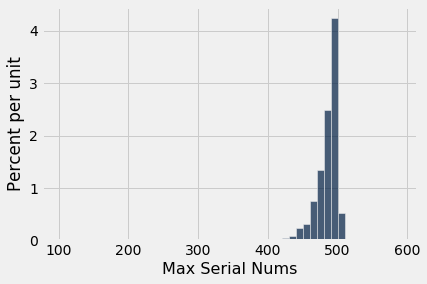

In [100]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

bins_size = np.arange(100, num_planes+100, 10)
Table().with_columns("Max Serial Nums", maxes).hist(bins=bins_size)

In [101]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


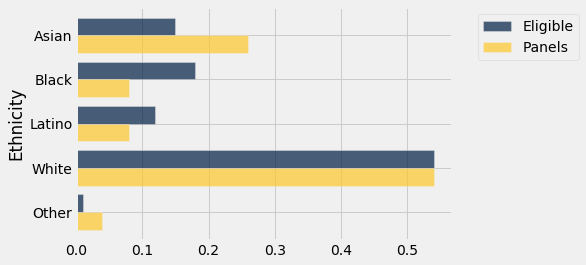

In [102]:
jury.barh("Ethnicity")

In [103]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [104]:
jury_with_diffs = jury_with_diffs.with_column("Abs. Diffs.", np.abs(jury_with_diffs.column("Difference")))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Abs. Diffs.
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [105]:
jury_with_diffs.column("Abs. Diffs.").sum()/2   # Notice the problem of item=0 ( zero item )

0.14

In [106]:
def tvd(distribution_1, distribution_2):
    total_var_diff = np.abs(distribution_1-distribution_2).sum()/2
    return total_var_diff

tvd(jury.column(1), jury.column(2))

0.14

In [107]:
''' ***************   random sample  ****************** '''
'''********************* proportions_from_distribution *****************'''
panel_size = 1453
panel_v_sample = proportions_from_distribution(jury, "Eligible", panel_size)   # panel_size?
panel_v_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.152787
Black,0.18,0.08,0.176875
Latino,0.12,0.08,0.127323
White,0.54,0.54,0.53682
Other,0.01,0.04,0.00619408


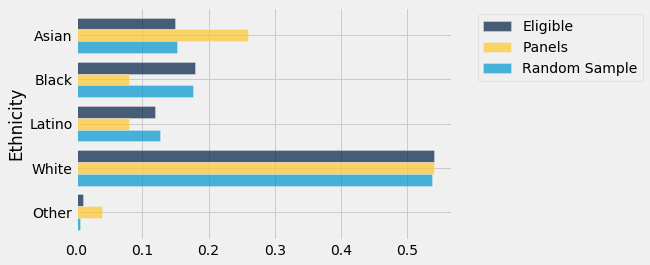

In [108]:
panel_v_sample.barh("Ethnicity")

In [109]:
tvd(panel_v_sample.column(1), panel_v_sample.column(3))   ## column(1) and column(3) are very close ?

0.010110116999311762

In [110]:
'''********************* proportions_from_distribution *****************''' 
panel_size = 1453
repetitions = 5000

tvds = make_array()

for i in np.arange(repetitions):

    new_sample = proportions_from_distribution(jury, 'Eligible', panel_size)
    tvds = np.append(tvds, tvd(new_sample.column(1), new_sample.column(3)))

results = Table().with_column('TVD', tvds)
results ## column(1) and column(3) are very close ?

TVD
0.0268548
0.0290158
0.0200688
0.00884377
0.0154783
0.0319959
0.0151273
0.0177839
0.0257261
0.0142395


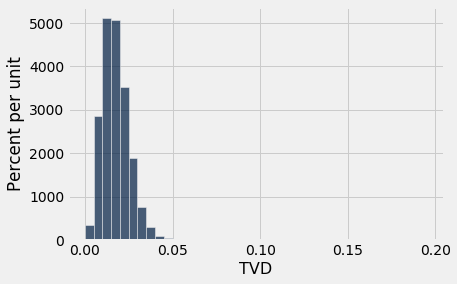

In [111]:
results.hist(bins=np.arange(0, 0.2, 0.005))

In [116]:
swain_jury = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain_jury
print(tvd(swain_jury.column(1), swain_jury.column(2)))
# Compute empirical distribution of TVDs


0.18000000000000002


In [119]:
panel_size = 100
repetitions = 5000

tvds = make_array()

for i in np.arange(repetitions):

    new_sample = proportions_from_distribution(swain_jury, 'Eligible', panel_size)
    tvds = np.append(tvds, tvd(new_sample.column(1), new_sample.column(3)))

results = Table().with_column('TVD', tvds)
print(results)


TVD
0.02
0.06
0.02
0.07
0.01
0.09
0.04
0.04
0.05
0
... (4990 rows omitted)


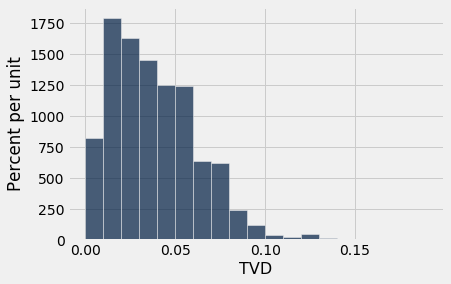

In [120]:
results.hist(bins = np.arange(0, 0.2, 0.01))